In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-23 14:33:18.859643: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-23 14:33:18.896433: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-23 14:33:19.413101: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/RJ_Reconstrucao_Sciaenidae_2024_08_06.xlsx')

df_Pescadas = df[['Ano','Pesc_goete_art', 'Pesc_amarela_art', 'Pesc_bicuda_art','Pesc_branca_art','Pesc_cambucu_art','Pesc_olhuda_art']].dropna().reset_index(drop=True)



for i in range(len(df_Pescadas['Ano'])):
  df_Pescadas.loc[i,'Soma'] = df_Pescadas.loc[i,'Pesc_goete_art']+df_Pescadas.loc[i,'Pesc_amarela_art']+df_Pescadas.loc[i,'Pesc_bicuda_art']+df_Pescadas.loc[i,'Pesc_branca_art']+df_Pescadas.loc[i,'Pesc_cambucu_art']+df_Pescadas.loc[i,'Pesc_olhuda_art']
  
dados = df_Pescadas[['Ano','Pesc_cambucu_art','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Pesc_cambucu_art'] = dados.loc[i,'Pesc_cambucu_art'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1962,1963,1964,1966,1967,1968,1969,1970,1971,1972,1973,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop= dados['Prop_Pesc_cambucu_art'].values
dados.head()


/tmp/ipykernel_16508/2264856271.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Prop_Pesc_cambucu_art'] = dados.loc[i,'Pesc_cambucu_art'] / dados.loc[i,'Soma']


,Ano,Pesc_cambucu_art,Soma,Prop_Pesc_cambucu_art
0,2010,0.00300,59.02500,0.000051
1,2017,9.20485,96.53743,0.095350
2,2018,16.18620,115.41620,0.140242
3,2019,12.30040,121.30690,0.101399
4,2020,11.09410,87.11952,0.127343


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std


In [12]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=20, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Desagregações Pescada_art 1962-2008/pesos prop Pesc_cambucu_art/.weights.h5', overwrite=True)

Epoch 1/20


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9838
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9046
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8460
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7879
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7202
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6462
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5682
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4881
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4092
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3421
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2906
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2589
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2422
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2310
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2186
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/st

In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Desagregações Pescada_art 1962-2008/pesos prop Pesc_cambucu_art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


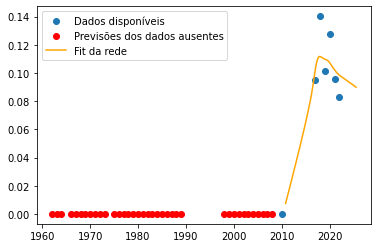

In [13]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

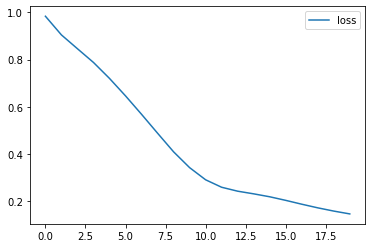

In [14]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [16]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_Pesc_cambucu_art',prev_continua)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
